In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import  metrics
%matplotlib inline

In [2]:
# Importing the dataset
train = pd.read_csv('D:\credit_train.csv')

In [3]:
train.head()

,Unnamed: 0,Unnamed: 0.1,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse.1
0,0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
train=train.drop('Unnamed: 0', axis=1)

In [5]:
train=train.drop('Unnamed: 0.1', axis=1)

In [6]:
train.shape

(150000, 11)

In [7]:
# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(train.columns)):
    cleancolumn.append(train.columns[i].replace('-', '').lower())
train.columns = cleancolumn

In [7]:
train.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberoftime6089dayspastduenotworse.1
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [8]:
train[train.columns[1:]].describe()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberoftime6089dayspastduenotworse.1
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [9]:
train[1:].isna().tail(10)

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberoftime6089dayspastduenotworse.1
149990,False,False,False,False,False,False,False,False,False,False,False
149991,False,False,False,False,False,False,False,False,False,False,False
149992,False,False,False,False,False,True,False,False,False,False,False
149993,False,False,False,False,False,False,False,False,False,False,False
149994,False,False,False,False,False,False,False,False,False,False,False
149995,False,False,False,False,False,False,False,False,False,False,False
149996,False,False,False,False,False,False,False,False,False,False,False
149997,False,False,False,False,False,True,False,False,False,False,False
149998,False,False,False,False,False,False,False,False,False,False,False
149999,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(train['seriousdlqin2yrs'])
percentage_labels = (train['seriousdlqin2yrs'].value_counts()/total_len)*100
percentage_labels

0    93.316
1     6.684
Name: seriousdlqin2yrs, dtype: float64

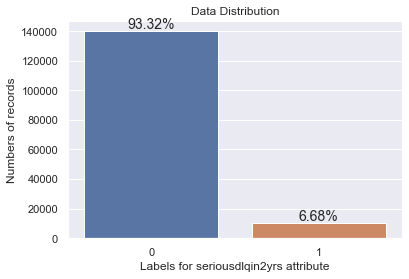

In [11]:
# Graphical representation of the target label percentage.
sns.set()
sns.countplot(train.seriousdlqin2yrs).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(8,8)})
ax.set_xlabel("Labels for seriousdlqin2yrs attribute")
ax.set_ylabel("Numbers of records")
plt.show()

In [12]:
# You will get to know which column has missing value and it's give the count that how many records are missing 
train.isnull().sum()

seriousdlqin2yrs                             0
revolvingutilizationofunsecuredlines         0
age                                          0
numberoftime3059dayspastduenotworse          0
debtratio                                    0
monthlyincome                            29731
numberofopencreditlinesandloans              0
numberoftimes90dayslate                      0
numberrealestateloansorlines                 0
numberoftime6089dayspastduenotworse          0
numberoftime6089dayspastduenotworse.1     3924
dtype: int64

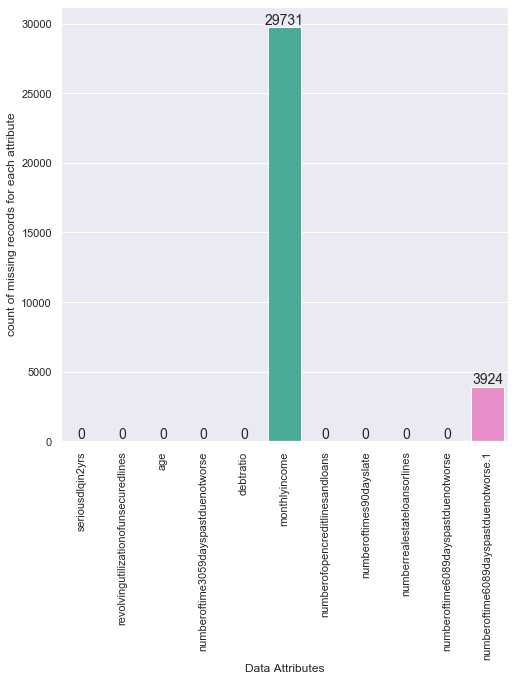

In [13]:
# Graphical representation of the missing values.
x = train.columns
y = train.isnull().sum()
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            int(height),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(8,8)})
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

In [14]:
# Actual replacement of the missing value using median value.
train_median = train.fillna((train.median()))
train_median.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberoftime6089dayspastduenotworse.1
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [15]:
train_median.isnull().sum()

seriousdlqin2yrs                         0
revolvingutilizationofunsecuredlines     0
age                                      0
numberoftime3059dayspastduenotworse      0
debtratio                                0
monthlyincome                            0
numberofopencreditlinesandloans          0
numberoftimes90dayslate                  0
numberrealestateloansorlines             0
numberoftime6089dayspastduenotworse      0
numberoftime6089dayspastduenotworse.1    0
dtype: int64

In [16]:
train.fillna((train.median()), inplace=True)

In [8]:
# Get the correlation of the training dataset
correlation=train[train.columns[1:]].corr()
correlation

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberoftime6089dayspastduenotworse.1
revolvingutilizationofunsecuredlines,1.000000,-0.005898,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557
age,-0.005898,1.000000,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303
numberoftime3059dayspastduenotworse,-0.001314,-0.062995,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680
debtratio,0.003961,0.024188,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673
monthlyincome,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
numberofopencreditlinesandloans,-0.011281,0.147705,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322
numberoftimes90dayslate,-0.001061,-0.061005,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176
numberrealestateloansorlines,0.006235,0.033150,-0.030565,0.120046,0.124959,0.433959,-0.045205,1.000000,-0.039722,0.124684
numberoftime6089dayspastduenotworse,-0.001048,-0.057159,0.987005,-0.007533,-0.011116,-0.071077,0.992796,-0.039722,1.000000,-0.010922
numberoftime6089dayspastduenotworse.1,0.001557,-0.213303,-0.002680,-0.040673,0.062647,0.065322,-0.010176,0.124684,-0.010922,1.000000


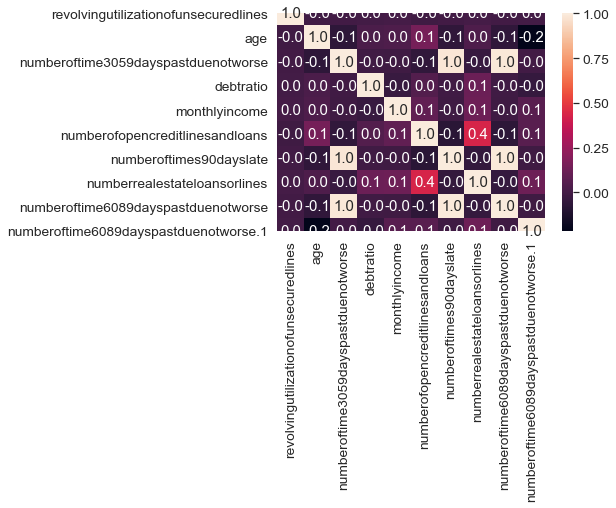

In [9]:
sns.set()
sns.set(font_scale=1.25)
sns.heatmap(train[train.columns[1:]].corr(),annot=True,fmt=".1f")
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

In [19]:
train.columns

Index(['seriousdlqin2yrs', 'revolvingutilizationofunsecuredlines', 'age',
       'numberoftime3059dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberrealestateloansorlines', 'numberoftime6089dayspastduenotworse',
       'numberoftime6089dayspastduenotworse.1'],
      dtype='object')

In [20]:
X=train.drop('seriousdlqin2yrs',axis=1)
y=train.seriousdlqin2yrs

In [21]:
train.columns[1:]

Index(['revolvingutilizationofunsecuredlines', 'age',
       'numberoftime3059dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberrealestateloansorlines', 'numberoftime6089dayspastduenotworse',
       'numberofdependents'],
      dtype='object')

In [22]:
from imblearn.over_sampling import SMOTE
import collections

In [23]:
smt = SMOTE(ratio = 0.6, random_state=9)
X,y = smt.fit_sample(X, y)

In [24]:
collections.Counter(y)

Counter({1: 83984, 0: 139974})

In [25]:
features_label = train.columns[1:]

In [26]:
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
importances = classifier.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) revolvingutilizationofunsecuredlines 0.222376
 2) age                            0.168364
 3) numberoftime3059dayspastduenotworse 0.126114
 4) debtratio                      0.099299
 5) monthlyincome                  0.092132
 6) numberofopencreditlinesandloans 0.073315
 7) numberoftimes90dayslate        0.059032
 8) numberrealestateloansorlines   0.058159
 9) numberoftime6089dayspastduenotworse 0.051950
10) numberofdependents             0.049259


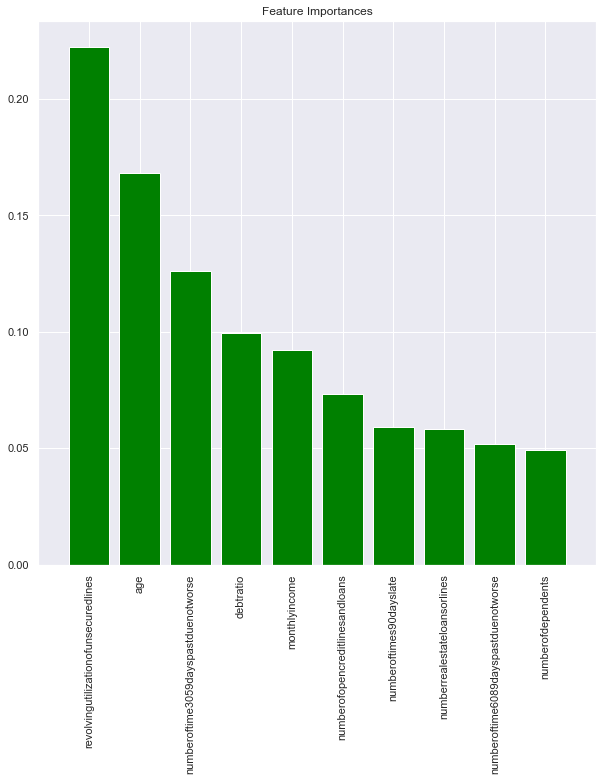

In [27]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()                                               

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [30]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
Random = RandomForestClassifier(n_estimators=1, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                  max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)
Random.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [31]:
# Predicting the Test set results
y_pred = Random.predict(X_test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

In [32]:
cm

array([[25954,  1871],
       [ 1873, 15094]], dtype=int64)

In [33]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     27825
           1       0.89      0.89      0.89     16967

    accuracy                           0.92     44792
   macro avg       0.91      0.91      0.91     44792
weighted avg       0.92      0.92      0.92     44792



In [34]:
test_labels=Random.predict_proba(np.array(X_test))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.9112506678176775

In [35]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[25954  1871]
 [ 1873 15094]]


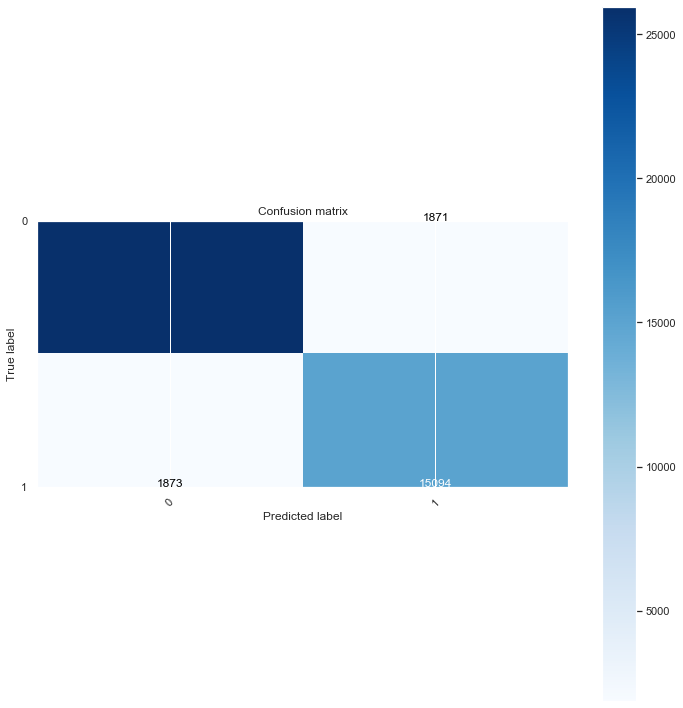

In [36]:
# Plot normalized confusion matrix
plot_confusion_matrix(cm,classes=[0,1])
sns.set(rc={'figure.figsize':(6,6)})
plt.show()

In [37]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)
Logistic.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=2,
                   warm_start=False)

In [38]:
# Predicting the Test set results

y_pred = Logistic.predict(X_test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

In [39]:
cm

array([[25826,  1999],
       [ 9423,  7544]], dtype=int64)

In [40]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82     27825
           1       0.79      0.44      0.57     16967

    accuracy                           0.74     44792
   macro avg       0.76      0.69      0.69     44792
weighted avg       0.75      0.74      0.72     44792



In [41]:
X_test=pd.DataFrame(X_test)

In [42]:
test_labels=Logistic.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.7993160487900222

Confusion matrix, without normalization
[[25826  1999]
 [ 9423  7544]]


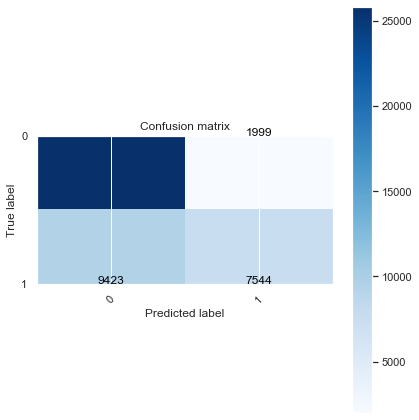

In [43]:
# Plot normalized confusion matrix
plot_confusion_matrix(cm,classes=[0,1])
sns.set(rc={'figure.figsize':(6,6)})
plt.show()

In [44]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
# Predicting the Test set results
y_pred = KNN.predict(X_test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

In [46]:
cm

array([[23015,  4810],
       [ 1951, 15016]], dtype=int64)

In [47]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87     27825
           1       0.76      0.89      0.82     16967

    accuracy                           0.85     44792
   macro avg       0.84      0.86      0.84     44792
weighted avg       0.86      0.85      0.85     44792



In [48]:
test_labels=KNN.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.9255341601484114

Confusion matrix, without normalization
[[23015  4810]
 [ 1951 15016]]


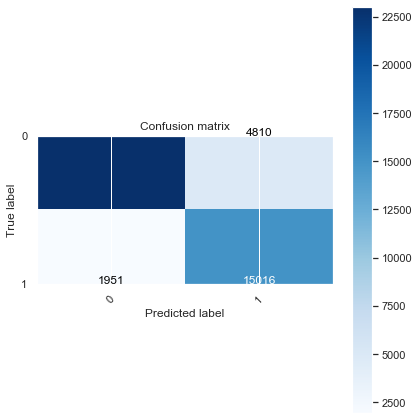

In [49]:
plot_confusion_matrix(cm,classes=[0,1])
sns.set(rc={'figure.figsize':(6,6)})
plt.show()

In [50]:
# Fitting Ada-boost to the Training set
from sklearn.neighbors import KNeighborsClassifier
ADA = AdaBoostClassifier(base_estimator=None, n_estimators=40, learning_rate=1.0)
ADA.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=40, random_state=None)

In [51]:
# Predicting the Test set results
y_pred = ADA.predict(X_test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cm

array([[26775,  1050],
       [ 2614, 14353]], dtype=int64)

In [52]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     27825
           1       0.93      0.85      0.89     16967

    accuracy                           0.92     44792
   macro avg       0.92      0.90      0.91     44792
weighted avg       0.92      0.92      0.92     44792



In [53]:
test_labels=ADA.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)


0.9649511500867575

Confusion matrix, without normalization
[[26775  1050]
 [ 2614 14353]]


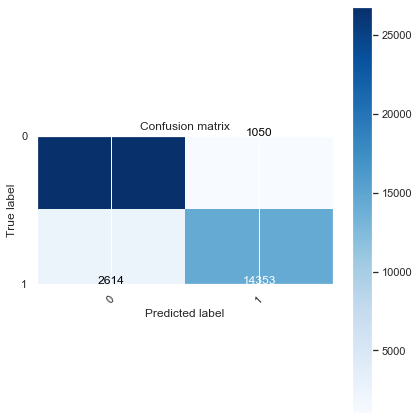

In [54]:
# Plot normalized confusion matrix
plot_confusion_matrix(cm,classes=[0,1])
sns.set(rc={'figure.figsize':(6,6)})
plt.show()

In [55]:
# Fitting GradientBoosting to the Training set
from sklearn.neighbors import KNeighborsClassifier
GradientBoo = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=75, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)
GradientBoo.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=75,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [56]:
# Predicting the Test set results
y_pred = GradientBoo.predict(X_test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
cm

array([[27276,   549],
       [ 2310, 14657]], dtype=int64)

In [57]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27825
           1       0.96      0.86      0.91     16967

    accuracy                           0.94     44792
   macro avg       0.94      0.92      0.93     44792
weighted avg       0.94      0.94      0.94     44792



In [58]:
test_labels=GradientBoo.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.974583526152532

Confusion matrix, without normalization
[[27276   549]
 [ 2310 14657]]


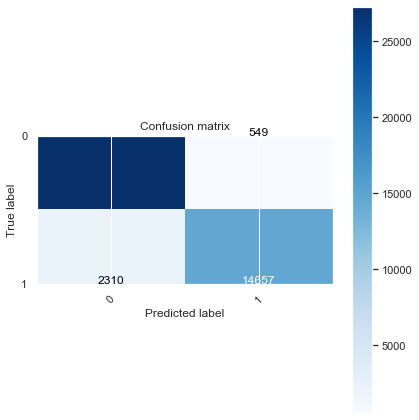

In [59]:
# Plot normalized confusion matrix
plot_confusion_matrix(cm,classes=[0,1])
sns.set(rc={'figure.figsize':(6,6)})
plt.show()

In [60]:
from sklearn.model_selection import cross_val_score
def cvDictGen(functions, scr, X_train=X, y_train=y, cv=5, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr,n_jobs=5)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[cvDict.keys()[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[cvDict.keys()[0]][1]))]
    return cvDictNormalized

In [61]:
cvD = cvDictGen(functions=[Random, Logistic, KNN, ADA, GradientBoo], scr='roc_auc')
cvD

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    2.9s remaining:    4.4s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    4.6s remaining:    7.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    5.9s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   17.7s remaining:   26.6s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   18.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   16.5s remaining:   24.8s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   16.9s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Don

{'RandomForestClassifier': [0.9000964706835216, 0.0804326180249361],
 'LogisticRegression': [0.8020616637273624, 0.006731989680967866],
 'KNeighborsClassifier': [0.9274757627767727, 0.0027183160355540234],
 'AdaBoostClassifier': [0.9630602052884158, 0.035028283221354095],
 'GradientBoostingClassifier': [0.9727810169924093, 0.03449264813425684]}

In [62]:
cvD = cvDictGen(functions=[Random, Logistic, KNN, ADA, GradientBoo], scr='f1')
cvD

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.6s remaining:    1.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.7s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    4.7s remaining:    7.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    5.3s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   18.4s remaining:   27.6s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   18.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   16.4s remaining:   24.7s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   16.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Don

{'RandomForestClassifier': [0.8689639720065401, 0.10784567268116707],
 'LogisticRegression': [0.5711824620040905, 0.007118788730262607],
 'KNeighborsClassifier': [0.8172023358230138, 0.0035685297773203695],
 'AdaBoostClassifier': [0.8614855751825548, 0.1070928238919082],
 'GradientBoostingClassifier': [0.8806568481794678, 0.13120386862535677]}

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [64]:
adaHyperParams = {'n_estimators': [200,300,400,500,650],'learning_rate':[0.1, 0.2,0.3,0.4]}
gridSearchAda = RandomizedSearchCV(estimator=ADA, param_distributions=adaHyperParams, n_iter=15,scoring='f1',cv=None,n_jobs=5,
                                   verbose=10).fit(X_train, y_train)
gridSearchAda.best_params_, gridSearchAda.best_score_

C:\Users\balas\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:  4.5min
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:  6.5min
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed: 10.1min
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed: 12.8min
[Parallel(n_jobs=5)]: Done  41 out of  45 | elapsed: 16.2min remaining:  1.6min
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed: 17.8min finished


({'n_estimators': 650, 'learning_rate': 0.4}, 0.9154281884620469)

In [65]:
gbHyperParams = {'n_estimators': [100,200,350,450,550],
                 'max_depth': [3,5,6,7,9]}
   
gridSearchGB = RandomizedSearchCV(estimator=GradientBoo, param_distributions=gbHyperParams, n_iter=15,
                                   scoring='f1', cv=None, verbose=15,n_jobs=6).fit(X_train, y_train)
gridSearchGB.best_params_, gridSearchGB.best_score_

C:\Users\balas\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  5.3min
[Parallel(n_jobs=6)]: Done   2 tasks      | elapsed:  5.4min
[Parallel(n_jobs=6)]: Done   3 tasks      | elapsed:  5.5min
[Parallel(n_jobs=6)]: Done   4 tasks      | elapsed: 10.5min
[Parallel(n_jobs=6)]: Done   5 tasks      | elapsed: 10.6min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed: 10.7min
[Parallel(n_jobs=6)]: Done   7 tasks      | elapsed: 15.5min
[Parallel(n_jobs=6)]: Done   8 tasks      | elapsed: 15.6min
[Parallel(n_jobs=6)]: Done   9 tasks      | elapsed: 15.6min
[Parallel(n_jobs=6)]: Done  10 tasks      | elapsed: 26.4min
[Parallel(n_jobs=6)]: Done  11 tasks      | elapsed: 26.4min
[Parallel(n_jobs=6)]: Done  12 tasks      | elapsed: 26.5min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed: 33.7min
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed: 33.7min
[Parallel(n_jobs=6)]: Done  15 tasks      | elapsed: 34.2min
[Parallel(n_jobs=6)]: Done  16 tasks      | elapsed: 34.6min
[Parallel(n_jobs=6)]: Do

({'n_estimators': 550, 'max_depth': 6}, 0.9356454664788815)

In [66]:
#Fitting both ADA and Gradient
bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [67]:
cvDictbestpara = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc')
cvDictbestpara

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed: 16.5min remaining: 24.7min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed: 16.8min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  4.4min remaining:  6.7min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  4.5min finished


{'GradientBoostingClassifier': [0.9719183684681385, 0.054885101970854645],
 'AdaBoostClassifier': [0.9709796484073989, 0.04196029013009713]}

In [68]:
cvDictbestf1= cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='f1')
cvDictbestf1   

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed: 16.2min remaining: 24.3min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed: 16.5min finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  4.6min remaining:  6.9min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  4.7min finished


{'GradientBoostingClassifier': [0.9016758410498638, 0.1614280163706614],
 'AdaBoostClassifier': [0.8841184139076355, 0.14346124421724846]}

In [69]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X_train_1 = np.array(X_train)
X_train_transform = transformer.transform(X_train_1)
X_test_1 = np.array(X_test)
X_test_transform = transformer.transform(X_test_1)

C:\Users\balas\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\balas\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [70]:
bestGbModFitted_transformed = gridSearchGB.best_estimator_.fit(X_train_transform, y_train)
bestAdaModFitted_transformed = gridSearchAda.best_estimator_.fit(X_train_transform, y_train)

In [71]:
from sklearn.ensemble import VotingClassifier
votingMod = VotingClassifier(estimators=[('gb', bestGbModFitted_transformed), 
                                         ('ada', bestAdaModFitted_transformed)], voting='soft',weights=[2,1])
votingMod = votingMod.fit(X_train_transform, y_train)

In [72]:
test_labels=votingMod.predict(np.array(X_test_transform))
votingMod.score(X_test_transform, y_test)   

0.9557510269691016

In [73]:
print("Precision:",metrics.precision_score(y_test, test_labels))
print("Recall:",metrics.recall_score(y_test, test_labels))
print("Accuracy:",metrics.accuracy_score(y_test, test_labels))
print("f1-score:",metrics.f1_score(y_test, test_labels))

Precision: 0.9780514260192688
Recall: 0.9034596569811988
Accuracy: 0.9557510269691016
f1-score: 0.9392769607843137


In [74]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.945548337026089

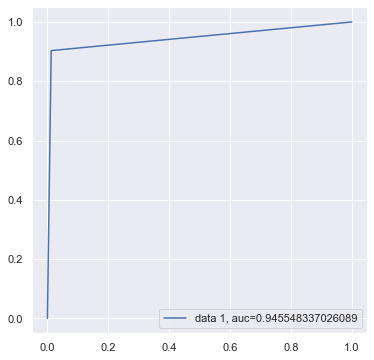

In [75]:
    fpr, tpr, _ = metrics.roc_curve(y_test, test_labels)
    fpr, tpr, _ = metrics.roc_curve(y_test,  test_labels)
    auc = metrics.roc_auc_score(y_test, test_labels)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

In [76]:
# Read Training dataset as well as drop the index column
test = pd.read_csv('D:\credit_test.csv').drop('Unnamed: 0', axis = 1)
# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(test.columns)):
    cleancolumn.append(test.columns[i].replace('-', '').lower())
test.columns = cleancolumn

In [77]:
test=test.drop('unnamed: 0.1', axis = 1)

In [78]:
test.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [79]:
test.drop(['seriousdlqin2yrs'], axis=1, inplace=True)

In [80]:
test.fillna((train_median.median()), inplace=True)

In [81]:
test.head()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [82]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
test_data_temp = np.array(test)
test_data_transform = transformer.transform(test_data_temp)

C:\Users\balas\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [83]:
test_labels_votingMod = votingMod.predict_proba(np.array(test_data_transform))[:,1]

In [84]:
test_values=votingMod.predict(np.array(test_data_transform))

In [85]:

output = pd.DataFrame({'ID_of_the_Customer':test.index, 'Probability_to_repay_the_credit':test_labels_votingMod,
                       'yes-1 or no-0 predicted_value':test_values})
output.to_csv("D:\predictions_For_Credit_Risk_Model.csv", index=False)